# Neural Network From Scratch (MNIST)
This is a 3 layer Neural Network coded from scratch to perform Multiclass Classification on MNIST Data from [Digit Recogniser](https://www.kaggle.com/competitions/digit-recognizer/data) dataset on Kaggle. This project aims to demystify machine learning concepts by walking through each step of the model's implementation.

**Table of Contents:**
* *1. Overview*
* *2. Concepts*
    * 2.1 The Perceptron
    * 2.2 What is Neural Network?
    * 2.3 Linear Combination + Activation Functions
    * 2.4 Loss & Backpropagation
    * 2.5 Regularisation & Optimisation
* *3. Data*
    * 3.1 Dataset Summary
    * 3.2 Training/Validation Split
    * 3.3 Normalisation
    * 3.4 One-Hot Encoding
* *4. Model*
    * 4.1 Parameter Initialisation
    * 4.2 Defining Activation Functions
    * 4.3 Forward Propagation
    * 4.4 Backward Propagation
    * 4.5 Model 1: Batch Gradient Descent
    * 4.6 Model 2: Mini-Batch + Adam
* *5. Training*
* *6. Results*

## 1. Overview
This project was implemented entirely from scratch in Python, without libraries like TensorFlow or PyTorch, to gain a deeper understanding of the internal mechanics of neural networks. The following is short overview of the project:

1. **Data**
* The dataset contains 42000 labelled examples of 28x28 images flattened into 784 dimensional vectors. The pixel values range from 0-255 and no missing values were reported.
* A secondary check for missing values was performed, along with a check on the frequency of each number 0-9 in the dataset. Pixel values were normalised from 0-255 to 0-1 and a one-hot encoding function was defined for later use in back propagation.
* The dataset was shuffled and split into two smaller datasets with the labels separated from the input vectors (X_train, Y_train, X_cv, Y_cv). X_train and Y_train cover 35000 examples and will be used for training the model while X_cv and Y_cv have 7000 examples and will be used for cross validation/testing.

2. **Model**
* The model implemented consists of an input layer of 784 units, 1st hidden layer of 256 units using a ReLU activation function, 2nd hidden layer of 64 units using a ReLU activation function, and output layer of 10 units using the Softmax activation function.
* The model utilises backpropagation with categorical cross-entropy loss function and L2 regularisation (controlled by hyperparameter $\lambda$).

3. **Training**

Two models with the aforementioned architecture were trained separately on the same dataset:
* Model 1: Batch gradient descent with a fixed learning rate $\alpha$.
* Model 2: Mini-batch gradient descent with the Adam optimiser.

4. **Results**
* Model 1: 92.1% accuracy after 500 iterations on training data. 91.3% accuracy on cross validation data.
* Model 2: 99.5% accuracy after 30 iterations on training data. 97.3% accuracy on cross validation data.

## 2. Concepts
### 2.1 Perceptron
The perceptron was invented by Frank Rosenblatt in 1957 and mimics a biological neuron as the fundamental block in artificial neural networks. Conceptually, you can think of it as a single neuron which takes in a number of inputs $\vec{x}$ and produces a single output $a$. The way it does this is that the neuron has weights for each input and will compute the weighted sum of inputs before putting it through a function to determine whether the output is 0 or 1.

<img src='fig_2.1.1.png' width='500' style='margin:auto'>

The original perceptron utilised the following function called the binary step function to mimic a biological neuron very closely:
$$g(z) = 
\begin{cases} 
1 & \text{if } z \geqslant 0\\
0 & \text{otherwise.}
\end{cases}$$
Just like how a biological neuron fires after incoming signals exceed a certain threshold, the perceptron utilising the binary step function produces an output of 1 in a similar fashion. In the modern day, this is no longer the only function that perceptrons use. Outputs can vary from -1 to 1 or from 0 to 1 depending on the activation function chosen. 

Do not worry about $g$ and $z$ for now, they will sense when we unpack them later on. Just keep in mind the concept that perceptrons were invented to mimic biological neuron firing and that they take in multiple inputs and produce one output. Later, we will break down how $z$ is derived, but first, let's see how these perceptrons connect to form a neural network.

### 2.2 What is a Neural Network?
A neural network is a collection of perceptrons often organised in layers such that the output vector from each layer of perceptrons will be read as inputs by the next layer, eventually producing predictions based on the original inputs. Think of $\vec{A}^{[1]}$, $\vec{A}^{[2]}$ and $\vec{A}^{[3]}$ as vectors which contain the outputs from each perceptron collectively forming a vector.

<img src='fig_2.2.1.png' width='600' style='margin:auto'>

$\vec{X}$ is the input information and $\vec{A}^{[3]}$ is the output/prediction. As the information goes through each layer, it gets transformed and abstracted such that earlier layers may detect only edges and curves, but deeper layers would piece together that information and detect more complex things like loops and corners. This is how neural networks can be used to perform complex binary/multiclass classifications or even regressions.

### 2.3 Linear Combination + Activation Functions

Now we will uncover what goes on within the perceptron and see how that eventually applied to a neural network. As mentioned previously, the perceptron takes in a number of inputs and assigns weights to them. What happens underneath is actually just a simple linear equation.

$$z = w*x + b$$

where $w$ is the weight, $x$ is the single input and $b$ is the bias for that equation. $w$ and $b$ are the parameters that will be subject to tuning when the model is trained. During the prediction, they are constants which transform $x$ and produce $z$.

However, if this linear equation were all there was to the neural network, layering perceptrons would be useless because it would eventually retain that linearity and just produce a complicated form of linear regression. As such, we would need to pass $z$ through a function $g()$ to introduce non-linearity such that each perceptron can 'make judgement' on its output based on the weighted sum of inputs. This function $g()$ is known as the activation function.

$$a = g(z) \text{ where } g \text{ is the activation function}$$

There now exists quite a few activation functions, namely the Sigmoid, tanh, ReLU, and Softmax function, these will be unpacked later on during implementation. Just note that the some activation functions will perform in a similar way to the aforementioned binary step function, where the weighted sum is assessed and if it passes a threshold, will output a distinctly different value than if the threshold was not passed. Other functions, rather than producing a binary output, may produce an output ranging from 0 to 1 or even -1 to 1.

When this concept is applied to a neural network, it will just include the multiplication of vectors as such:

$$\vec{z} = \vec{w}^{T}\vec{x} + \vec{b}$$
$$\vec{a} = g(\vec{z})$$

This output $a$ is either the prediction (output layer) or passed to the next layer (hidden layer). Each layer that performs this calculation will have outputs passed on to the next. This is called forward propagation.

### 2.4 Loss & Backpropagation

Loss is essentially a score which measures how wrong a model's prediction is relative to the true value. Since we are attempting multiclass classification, we will be using a Categorical Cross-Entropy Loss Function. A simple explanation for this loss function would be as such:
1.  A model outputs a probability for each potential outcome, let's say they favour 3 giving it a probability of 0.8.
2.  The loss function will perform $-\log{}$ on the probability to measure the 'surprise' factor for the actual number, returning a vector of shape (10, 1) from the prediction vector also of shape (10, 1) which assigned probabilities to each possible outcome ranging 0 - 9.
3.  Since we one-hot encode the actual value (where a value of say 3 is transformed to a (10, 1) vector where all values are 0 except the 4th index, since 1st index is value 0), we multiply the one-hot encoded vector with the prediction vector, leaving all other log probabilities to be 0 except the actual value, showing how 'surprised' the model should be if it guessed right or wrong.

This happens when the model predicts one example. Usually, we calculate the **cost** which is the mean loss for a model throughout a dataset. This sequence is how we get to the equation below:

$$\text{Cost } = -\frac{1}{m}\sum_{i = 1}^{m}\sum_{j = 1}^{C}{y}_{i,j}\cdot{\log{\hat{y}_{i,j}}}$$

$m$ = number of training examples <br>
$C$ = number of classes (multiclass classifciation) <br>
${y}_{i}$ = actual value <br>
$\hat{y}_{i}$ = predicted value

Backpropagation is where the 'learning' takes place in a model. The general process is as such:

1. A model starts off with random weights and biases and produces predictions.
2. We then compute the loss which indicates how far the model's predictions are from the actual value.
3. This loss is then used to find the gradients for each weight $w$ and bias $b$ in the neural network, often using the chain rule. These gradients tell us the direction and steepness the current $w$ or $b$ is on and has to move to.
4. Gradient descent is used to push $w$ and $b$ closer and closer to the bottom of the slope in order to minimise the loss function. This is done using the product of the gradient and a learning rate {\alpha} which is a hyperparameter determining how 'big of a step' the variable should take.
   $$\frac{dL}{dw} = \frac{dL}{da}\cdot{\frac{da}{dz}}\cdot{\frac{dz}{dw}}$$
   $$w := w - {\alpha}\frac{dL}{dw}$$
6. After doing this many times, one hopes for the model to converge and reach a minimum point (global minima), ideally without getting stuck in some ditches along the way (local minima).

### 2.5 Regularisation & Optimisation

Regularisation is a way to prevent a model from overfitting, which means that it performs very well on the training data but does not perform well on the test data because it fails to generalise. Think of overfitting like someone memorising test answers from a cheat sheet rather than actually understanding the concepts to help them answer new questions correctly.

To reduce overfitting, we add a regularisation term to the model’s cost function — this term penalises complex models by discouraging very large weights. Large weights are often associated with overly sensitive decision boundaries that memorise noise instead of learning general patterns.

$$\text{Cost } = \text{Loss } + \lambda\sum_{j}{w}^{2}_{j}$$

$\text{Loss}$ = how wrong the predicted values are from actual values
$\lambda$ = A hyperparameter which controls how much penalty is applied (regularisation strength)
$\sum_{j}{w}^{2}_{j}$ = The sum of squared weights, the L2 penalty.

Optimisation essentially means fine-tuning the way a model guesses to get the most accurate prediction possible with a specific model architecture. In this case, we are using the Adam (Adaptive Moment Estimation) Optimiser in Model 2 which combines:
* Momentum
* RMSProp

This makes it particularly useful for training deep neural networks where the cost landscape can be very complex and irregular. More will be shared on the Adam Optimiser later on.

## 3. Data
### 3.1 Dataset Summary
Firstly, we import the 3 libraries required to manipulate the data and perform calculations such as matrix multiplication much faster than with regular Python. Read the data from the csv file and visualise a few examples of handwritten digits to gain an understanding of the data we are working with.

Although the dataset claims to be clean , we should perform a secondary check to ensure there are no null values. Once done, I shuffle the dataset to prepare it for slicing into training and cross validation data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')

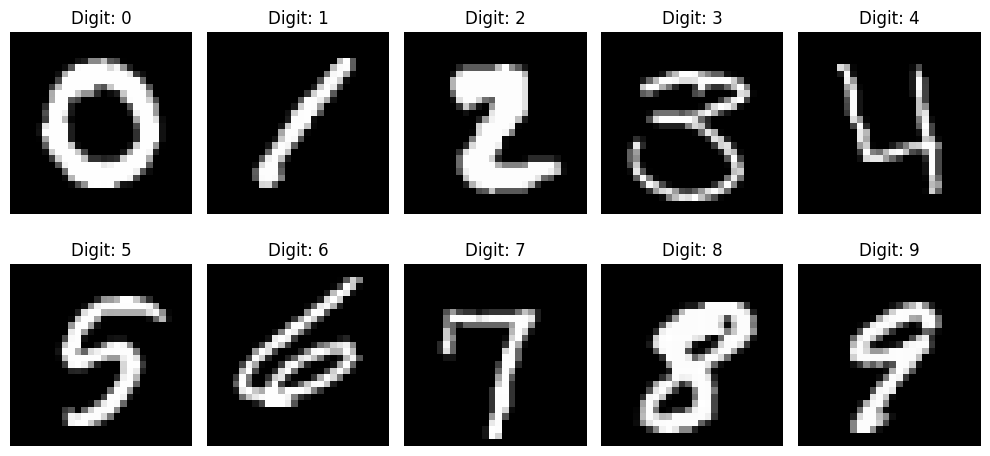

In [3]:
plt.figure(figsize=(10,5))

for digit in range(10):
    example = train_df[train_df['label'] == digit].iloc[0,1:].values
    image = example.reshape(28,28)

    plt.subplot(2,5,digit+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Digit: {digit}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Performing a check to ensure there are no null values and that the dataset is clean.

In [4]:
train_df.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [5]:
train_df = train_df.sample(frac = 1)
print(train_df.shape)
train_df.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
19780,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27852,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29747,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1620,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
690,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.2 Training/Validation Split
Having shuffled the training data, slice the data into X_train and Y_train, X_cv and Y_cv. Afterwards, check on the distribution of values to ensure that the dataset reflects an equal number of examples for each value ranging from 0 - 9.

In [6]:
X_train = train_df.iloc[:35000,1:]
X_cv = train_df.iloc[35000:,1:]
Y_train = train_df.iloc[:35000,0]
Y_cv = train_df.iloc[35000:,0]

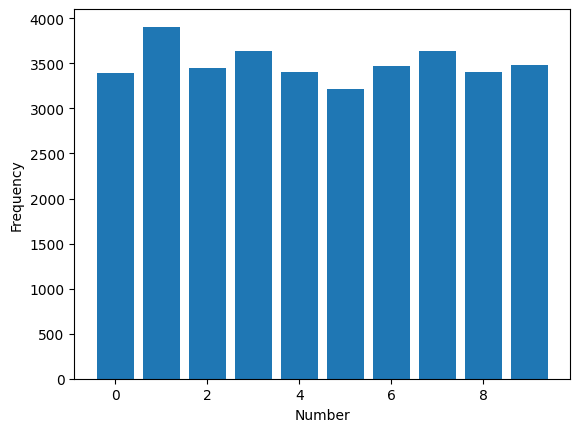

In [7]:
Y_counter = {}
for num in Y_train:
    if num in Y_counter:
        Y_counter[num] += 1
    else:
        Y_counter[num] = 1
plt.bar(Y_counter.keys(), Y_counter.values())
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()

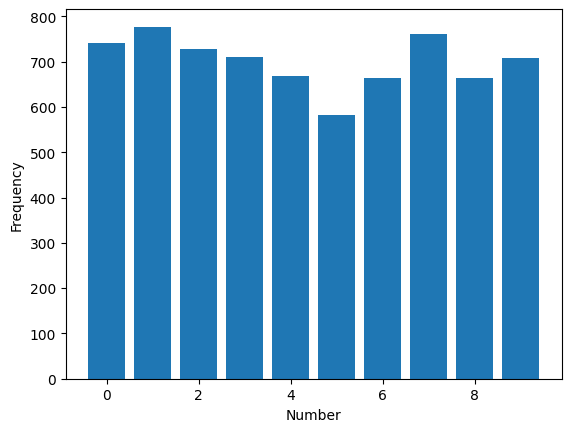

In [8]:
Y_counter = {}
for num in Y_cv:
    if num in Y_counter:
        Y_counter[num] += 1
    else:
        Y_counter[num] = 1
plt.bar(Y_counter.keys(), Y_counter.values())
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()

### 3.3 Normalisation
We noticed that the dataset has pixel values which range from 0 - 255. This range is not compatible with neural networks which usually deal with a range of values from 0 - 1. Thus to make the pixel values more readable, we normalise the training data by dividing everything by 255 and transforming the vectors for each example such that they are (n, 1) instead of (1, n).

In [9]:
print(X_train.max().max())
print(X_cv.max().max())

255
255


In [10]:
X_train = np.divide(X_train, 255).T
X_cv = np.divide(X_cv, 255).T
print(X_train.max().max())
print(X_cv.max().max())

1.0
1.0


In [11]:
print(X_train.shape)
print(X_cv.shape)

(784, 35000)
(784, 7000)


### 3.4 One-Hot Encoding
Here, I define a one-hot encoding function which turns each label Y from its values to a vector of shape (1, 10) where all values are 0 except for the indexed position of the value which will be 1. E.g. 2 --> [0, 0, 1, 0, 0, ...]

Although the vector should take the shape (10, 1) instead of (1, 10) to be used in matrix multiplication later on, I only code the transformation later and did not include it in the one-hot encoding function.

In [12]:
def one_hot(labels):
    one_hot_labels = []

    for label in labels:
        vector = np.zeros(10)
        vector[label] = 1
        one_hot_labels.append(vector)

    return np.array(one_hot_labels)

## 4. Model
### 4.1 Parameter Initialisation
This is where the model architecture is mostly built, by initialising the weights $w$ and biases $b$ at each layer of the neural network. We are adopting a neural network architecture with 784 input neurons, 256 1st hidden layer neurons, 64 2nd hidden layer neurons, and 10 output layer neurons.

Usually, parameter initialisation keeps biases at zero and randomises the weights between 0 and 1. This cases opts for the use of **He Initialisation** after issues with vanishing and exploding gradients in previous iterations of the project. The goal of He Initialisation is to ensure that the starting signals do not end up becoming either too weak or too noisy as it continues through the neural network because that would result in problematic predictions down the road.

In He Initialisation, we use this before putting it into a ReLU function because ReLU usually zeros out half the outputs, halving the variance in the process. To counter this, we want the variance to be twice as large in order to compensate: 

$$\text{Var}(W) = \frac{2}{n}$$

Before the Softmax function, there is no need to keep the variance twice as large since it does not zero out half the outputs like ReLU, thus we can use a smaller variance since there isn't much to compensate for:

$$\text{Var}(W) = \frac{1}{n}$$

In [13]:
def init_params():
    W1 = np.random.randn(256, 784) * np.sqrt(2 / 784)
    b1 = np.zeros((256, 1))
    W2 = np.random.randn(64, 256) * np.sqrt(2 / 256)
    b2 = np.zeros((64, 1))
    W3 = np.random.randn(10, 64) * np.sqrt(1 / 64)
    b3 = np.zeros((10, 1))
    params = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2, 'W3':W3, 'b3':b3}
    return params

### 4.2 Activation Functions
There are many activation functions, the 6 most common ones being:
* Sigmoid: $y = \frac{1}{1 + e^{-z}}$
* tanh: $y = \tanh(z)$
* ReLU: $y = \max(z,0)$
* Softplus: $y = \log(1 + e^z)$
* Leaky ReLU: $y = \max(z, \alpha z)$, where $0 \lt \alpha \lt 1$ and is typically a small number like 0.01.
* ELU: $y = \begin{cases} z,~~z\gt 0 \\ \alpha(e^z - 1)~~z \leq 0 \end{cases}$

<img src='fig_4.2.1.png' width='1000' style='margin:auto'>

For our case, we use the ReLU function for hidden layers and Softmax function for output layer. 

**ReLU Function** is preferred for the hidden layers because it aids in solving the problem of vanishing gradients due to have a gradient of 1 for positive values, letting gradients flow better during backpropagation. Additionally, it contains 'sparsity' (where many neurons have output 0, forcing the model to focus on important features) which allows for better generalisation in neural networks. Furthermore, the gradient of the cost function will be smoother compared to something like Sigmoid which tends to flatten the gradient if the values are too positive or negative, making the gradient more choppy and prone to local minima.

**Softmax Function** works specifically for the output layer for Multiclass Classification by essentially turning a vector into probabilities between 0 and 1. It does so by raising $e$ to the power of the value in the vector (this exaggerates the value) and then divides that result by the sum of all $e^z$ so that the result ranges from 0 to 1, emphasising the value that the model likely thinks is the prediction.

<img src='fig_4.2.2.webp' width='600' style='margin:auto'>

In [14]:
def ReLU(Z):
    return np.maximum(0, Z)

def Softmax(Z):
    Z_stable = Z - np.max(Z, axis=0, keepdims=True)  # numerical stability
    exp_Z = np.exp(Z_stable)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

### 4.3 Forward Propagation
As mentioned earlier, forward propagation relies on the following 2 equations for each layer:
$$\vec{z} = \vec{w}\cdot{\vec{x}} + \vec{b}$$
$$\vec{a} = g(\vec{z})$$
The steps for each layer is almost entirely the same, with the only difference being the activation function used. The use of matrix multiplication allows each layer to be computed in a single equation, which is also where we capitalise on Numpy's dot product method for faster computation. At this stage, it is important to take note of the shape of the vector to ensure no errors due to mismatching of shape.

In [15]:
def forward_prop(params, X):
    W1, b1 = params['W1'], params['b1']
    W2, b2 = params['W2'], params['b2']
    W3, b3 = params['W3'], params['b3']
    # First layer
    Z1 = np.dot(W1, X) + b1          # shape (256, 1)
    A1 = ReLU(Z1)                    # shape (256, 1)
    # Second layer
    Z2 = np.dot(W2, A1) + b2         # shape (64, 1)
    A2 = ReLU(Z2)                    # shape (64, 1)
    # Third layer
    Z3 = np.dot(W3, A2) + b3         # shape (10, 1)
    A3 = Softmax(Z3)                 # shape (10, 1)
    forw_values = {'Z1':Z1, 'A1':A1, 'Z2':Z2, 'A2':A2, 'Z3':Z3, 'A3':A3}
    return A3, forw_values

### 4.4 Backward Propagation
Back propagation should rely on the following equation for the derivative of ReLU and Softmax respectively:
$$\text{Softmax: } \frac{dL}{dz} = a - y$$
$$\text{ReLU: } \frac{dL}{dz} = \begin{cases} 
1 & \text{if } z \gt 0\\
0 & \text{otherwise.}
\end{cases}$$

Apart from this, using the chain rule for the variables as follows:
$$\frac{dL}{dw} = \frac{dL}{da}\cdot{\frac{da}{dz}}\cdot{\frac{dz}{dw}}$$

As we work backwards, finding the gradients for each variable:
$$\frac{dL}{dZ^{[3]}} = \vec{A^{[3]}} - \hat{y} \text{ (Softmax Function)}$$
$$\frac{dL}{dW^{[3]}} = \frac{dL}{dZ^{[3]}} \cdot{\frac{dZ^{[3]}}{dW^{[3]}}} = \frac{1}{m}(\frac{dL}{dZ^{[3]}}\cdot{\vec{(A^{[2]})^{T}}}) + \frac{\lambda}{m}{W^{[3]}}\text{ (Regularisation Term)}$$
$$\frac{dL}{db^{[3]}} = \frac{dL}{dZ^{[3]}} \cdot{\frac{dZ^{[3]}}{db^{[3]}}} = \frac{1}{m}\sum_{i=1}^{m}{\frac{dL}{dZ^{[3]}}}$$
$$\frac{dL}{dA^{[2]}} = \frac{dL}{dZ^{[3]}} \cdot{\frac{dZ^{[3]}}{dA^{[2]}}} = \frac{1}{m}(\frac{dL}{dZ^{[3]}} \cdot{\vec{(W^{[3]})^{T}}})$$
$$\frac{dL}{dZ^{[2]}} = \frac{dL}{dA^{[2]}} \cdot{\frac{dA^{[2]}}{dZ^{[2]}}} = \frac{dL}{dA^{[2]}} \odot{g'(\vec{Z^{[2]}})} \text{ (ReLU Function)}$$
$$...$$
This will repeat for the next ReLU layer till all the derivatives of the weights and biases have been computed.

In [16]:
def compute_cost(A3, Y, lambda_, params): ##
    m = Y.shape[1]
    W1, b1 = params['W1'], params['b1']
    W2, b2 = params['W2'], params['b2']
    W3, b3 = params['W3'], params['b3']
    log_prob = np.log(A3+1e-8)
    cross_entropy_loss = (-1/m)*np.sum(Y*log_prob)
    regularisation_term = (lambda_ / (2 * m)) * (np.sum(W1 ** 2) + np.sum(W2 ** 2) + np.sum(W3 ** 2))
    cost = cross_entropy_loss + regularisation_term
    return cost

In [17]:
def ReLU_deriv(Z):
    return Z > 0

In [18]:
def back_prop(X, Y, forw_values, params, lambda_):
    m = Y.shape[1]
    A1, Z1 = forw_values['A1'], forw_values['Z1']
    A2, Z2 = forw_values['A2'], forw_values['Z2']
    A3, Z3 = forw_values['A3'], forw_values['Z3']
    W1, b1 = params['W1'], params['b1']
    W2, b2 = params['W2'], params['b2']
    W3, b3 = params['W3'], params['b3']
    
    dZ3 = A3 - Y            # A3 = dZ3 due to softmax function, shape (10, n)
    dW3 = (1/m)*np.dot(dZ3,A2.T) + (lambda_/m)*W3              # shape (10, 64)
    db3 = (1/m)*np.sum(dZ3, axis=1, keepdims=True)             # shape (10, 1)

    dA2 = np.dot(params['W3'].T,dZ3)                           # shape (64, n)
    dZ2 = dA2 * ReLU_deriv(Z2)                                 # shape (64, n)
    dW2 = (1/m)*np.dot(dZ2,A1.T) + (lambda_/m)*W2              # shape (64, 256)
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)             # shape (64, 1)

    dA1 = np.dot(params['W2'].T,dZ2)                           # shape (256, n)
    dZ1 = dA1 * ReLU_deriv(Z1)                                 # shape (256, n)
    dW1 = (1/m)*np.dot(dZ1,X.T) + (lambda_/m)*W1               # shape (256, 784)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)             # shape (256, 1)
    gradients = {'dZ3':dZ3, 'dW3':dW3, 'db3':db3, 
            'dZ2':dZ2, 'dW2':dW2, 'db2':db2,
            'dZ1':dZ1, 'dW1':dW1, 'db1':db1}
    return gradients

### 4.5 Model 1: Batch Gradient Descent
Once back propagation has been defined, it is time to implement our first model. This first model is simple because it takes the gradients at each step of backpropagation and multiplies it by a hyperparameter $\alpha$ which is a fixed learning rate, determining how big of a step each $w$ or $b$ will take towards the minima.

Before that, we define a prediction function and an accuracy function. 
* The prediction function finds the maximum probability within the vector $\vec{A^{[3]}}$ and returns the index, essentially prediction.
* The accuracy function takes the prediction and compares it against the actual answer. It then returns the percentage of times the prediction matches the actual answer.

Then, we define a gradient descent algorithm for the first model, utilising Batch Gradient Descent with Fixed Learning Rate. At each step, the model will engage in:
* *Forward Propagation:* Making prediction based on the input.
* *Loss Computation:* Find the difference between output probabilities and the one-hot encoded actual answer.
* *Back Propagation:* Find the gradients for each $w$ and $b$.
* *Update Parameters:* Changing the values of $w$ and $b$ based on a fixed learning rate $\alpha$ and their respective gradients.

In [19]:
def get_prediction(A3):
    return np.argmax(A3, 0)

def get_accuracy(prediction, Y):
    if isinstance(Y, pd.Series):
        Y = Y.to_numpy()
    if Y.ndim > 1 and Y.shape[0] > 1:
        Y = np.argmax(Y, axis=0)
    elif Y.ndim > 1:
        Y = Y.flatten()
    return np.mean(prediction == Y)

In [20]:
def update_fixed(params, gradients, alpha):
    params['W1'] -= alpha * gradients['dW1']
    params['b1'] -= alpha * gradients['db1']
    params['W2'] -= alpha * gradients['dW2']
    params['b2'] -= alpha * gradients['db2']
    params['W3'] -= alpha * gradients['dW3']
    params['b3'] -= alpha * gradients['db3']
    return params

In [21]:
def gradient_descent_fixed(X, Y, iterations, alpha, lambda_, itera):
    params = init_params()
    Y_trainhot = one_hot(Y).T
    loss_hist = []
    iter_hist = []
    
    for i in range(1, iterations+1):
        A3, forw_values = forward_prop(params, X)
        gradients = back_prop(X, Y_trainhot, forw_values, params, lambda_)
        params = update_fixed(params, gradients, alpha)
        
        cost = compute_cost(A3, Y_trainhot, lambda_, params)
        iter_hist.append(i)
        loss_hist.append(cost)
        
        if (i % itera) == 0:
            prediction = get_prediction(A3)
            accuracy = get_accuracy(prediction, Y)
            print(f'Iteration: {i}')
            print(f'Loss: {cost}, Accuracy: {accuracy*100}')
            

    plt.plot(iter_hist, loss_hist)
    plt.title('Training Loss over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()
    
    return params   

### 4.6 Model 2: Mini-Batch + Adam
Model 2 utilises a learning rate optimiser known as the **Adam Optimiser** (Adaptive Moment Estimation). This makes use of Momentum and RMSProp:
* Momentum - Takes into account past gradients in previous iterations, getting the learning rate to make a bigger step if past gradients were steeper and a smaller step if past gradients were gentler.
* RMSProp - Tracks the magnitude of past gradients by squaring them, adapting the learning rate to be smaller for large gradients (avoid overshooting) and larger for small gradients.

This enables each iteration to utilise a **Mini-Batch Gradient Descent** so that the Adam Optimiser can update the learning rate frequently after each mini-batch. If it were to utilise batch gradient descent, the learning rate would only be able to update per batch, reducing effectiveness. Using Mini-Batch Gradient Descent is helpful as well since splitting each iteration into smaller batches can smooth out noise for the model compared to Stochastic Gradient Descent, preventing fluctuations that are too random or reactive.

The Adam Optimiser follows the equations below:
$$\text{Momentum: } m_{t} = \beta_{1} * m_{t-1} + (1 - \beta_{1}) * g_{t}$$
$$\text{RMSProp: } v_{t} = \beta_{2} * v_{t-1} + (1 - \beta_{2}) * g^{2}_{t}$$
$$\bigtriangleup{w^{t}} = \eta\frac{m_{t}}{\sqrt{v_{t} + \epsilon}}$$
$$w_{t+1} = w_{t} - \bigtriangleup{w_{t}}$$

$\eta$: Initial learning rate <br>
$g_{t}$: Gradient at time $t$ <br>
$m_{t}$: Exponential average of gradients <br>
$v_{t}$: Exponential average of square of gradients (exaggerates if gradients are erratic vs smooth) <br>
$\beta{1}$ and $\beta{2}$: Hyperparameters controlling the decay rate of in $m_{t}$ and $v_{t}$ <br>

In [22]:
def update_adam(params, gradients, alpha, t, m, v, beta1=0.85, beta2=0.999, epsilon=1e-3):
    t += 1
    for key in params:
        g = gradients['d'+key]
        m[key] = beta1*m[key] + (1-beta1)*g
        v[key] = beta2*v[key] + (1-beta2)*(g**2)
        m_hat = m[key] / (1-beta1**t)
        v_hat = v[key] / (1-beta2**t)
        params[key] -= alpha * ((m_hat) / (np.sqrt(v_hat) + epsilon))
        
    return params, m, v, t

In [23]:
def mini_batch(X, Y, batch_size):
    X = X.to_numpy() if hasattr(X, 'to_numpy') else X
    Y = Y.to_numpy() if hasattr(Y, 'to_numpy') else Y

    m = X.shape[1] if X.ndim > 1 else len(X)
    perm = np.random.permutation(m)

    X_mix = X[:, perm] if X.ndim > 1 else X[perm]
    Y_mix = Y[perm] if Y.ndim > 1 else Y[perm]
    
    times = m // batch_size
    mini_batches = []
    
    for i in range(times):
        X_batch = X_mix[:, i*batch_size:(i+1)*batch_size]
        Y_batch = Y_mix[i*batch_size:(i+1)*batch_size]
        mini_batches.append((X_batch, Y_batch))
    
    if m % batch_size != 0:
        X_batch = X_mix[:, times*batch_size:]
        Y_batch = Y_mix[times*batch_size:]
        mini_batches.append((X_batch, Y_batch))

    return mini_batches

In [24]:
def gradient_descent_adam(X, Y, iterations, alpha, lambda_, itera):
    params = init_params()
    m = {key: np.zeros_like(value) for key, value in params.items()}
    v = {key: np.zeros_like(value) for key, value in params.items()}
    t = 0
    loss_hist = []
    iter_hist = []
    
    for i in range(1, iterations+1):
        mini_batches = mini_batch(X, Y, 64)
        for X_batch, Y_batch in mini_batches:
            Y_batchhot = one_hot(Y_batch).T
            A3, forw_values = forward_prop(params, X_batch)
            gradients = back_prop(X_batch, Y_batchhot, forw_values, params, lambda_)
            params, m, v, t = update_adam(params, gradients, alpha, t, m, v)
            
        Y_hot = one_hot(Y).T
        A3_full, _ = forward_prop(params, X)
        cost = compute_cost(A3_full, Y_hot, lambda_, params)
        iter_hist.append(i)
        loss_hist.append(cost)
        
        if (i % itera) == 0:
            prediction = get_prediction(A3_full)
            accuracy = get_accuracy(prediction, Y)
            print(f'Iteration: {i}')
            print(f'Loss: {cost}, Accuracy: {accuracy*100}')

    plt.plot(iter_hist, loss_hist)
    plt.title('Training Loss over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()
        
    return params

## 5. Training
At this stage, it is time to train the models. 

By checking the loss and accuracy across iterations of training, we can see how the models learn and compare their performance. This will allow us to compare the effectiveness of both models' architecture and the optimisation methods we incorporated into the model.

Iteration: 50
Loss: 1.1359782670992118, Accuracy: 77.52
Iteration: 100
Loss: 0.6171842190681278, Accuracy: 85.52285714285715
Iteration: 150
Loss: 0.47010995093227775, Accuracy: 87.9342857142857
Iteration: 200
Loss: 0.40508188330271583, Accuracy: 89.17714285714285
Iteration: 250
Loss: 0.3676059099047954, Accuracy: 89.87714285714286
Iteration: 300
Loss: 0.34204885758300324, Accuracy: 90.42857142857143
Iteration: 350
Loss: 0.3228318410403918, Accuracy: 90.96571428571428
Iteration: 400
Loss: 0.3074200263750738, Accuracy: 91.39714285714285
Iteration: 450
Loss: 0.29446267342615906, Accuracy: 91.78
Iteration: 500
Loss: 0.2832686202242872, Accuracy: 92.05142857142857


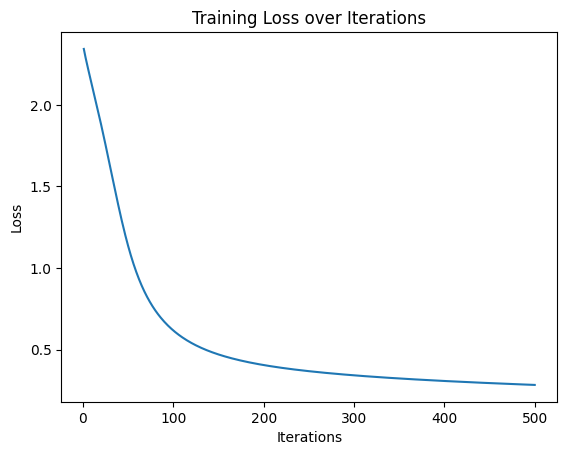

In [25]:
params_fixed = gradient_descent_fixed(X_train, Y_train, 500, 0.05, 0.01, 50)

Iteration: 5
Loss: 0.0514403215276049, Accuracy: 98.35714285714286
Iteration: 10
Loss: 0.038508802467962025, Accuracy: 98.71428571428571
Iteration: 15
Loss: 0.04430428955069028, Accuracy: 98.5
Iteration: 20
Loss: 0.03689574885171959, Accuracy: 98.81428571428572
Iteration: 25
Loss: 0.05421839289797045, Accuracy: 98.22857142857143
Iteration: 30
Loss: 0.018885037139560447, Accuracy: 99.45142857142856


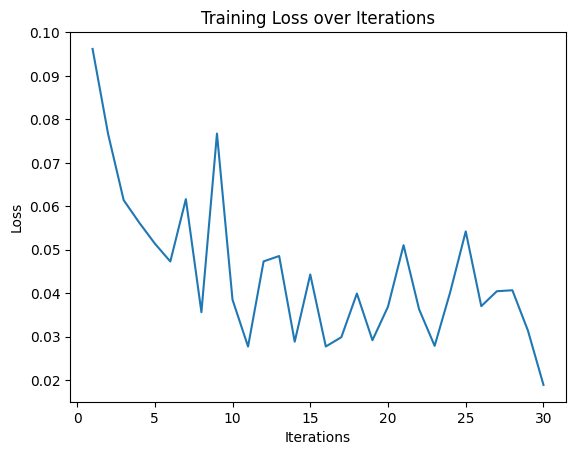

In [26]:
params_adam = gradient_descent_adam(X_train, Y_train, 30, 0.005, 0.01, 5)

## 6. Results
Now, to ensure that the models are not overfit to the data and still has the ability to generalise, we test the model on the cross validation dataset.

In [27]:
def param_test(X, Y, params, lambda_):
    Y_hot = one_hot(Y).T
    A3, forw_values = forward_prop(params, X)
    prediction = get_prediction(A3)
    accuracy = get_accuracy(prediction, Y)
    cost = compute_cost(A3, Y_hot, lambda_, params)
    print(f'Loss: {cost}, Accuracy: {accuracy*100}')

In [28]:
param_test(X_cv, Y_cv, params_fixed, 0.01)

Loss: 0.30448372064898593, Accuracy: 91.32857142857142


In [29]:
param_test(X_cv, Y_cv, params_adam, 0.01)

Loss: 0.09884222048530321, Accuracy: 97.25714285714285


After training and testing both models, we can observe a clear performance difference:
* Model 1 (Fixed Learning Rate, Batch Gradient Descent) tested with a 91.3% accuracy.
* Model 2 (Adam Optimiser, Mini-Batch Gradient Descent) tested with a 97.3% accuracy.

Model 2 likely performed better due to the Adam Optimiser's ability to adapt the learning rate dynamically for each parameter. Unlike the fixed learning rate, Adam combines the advantages of momentum and RMSProp, allowing the model to:
1. Escape shallow or poor local minima.
2. Adjust learning rates per parameter more intelligently.
3. Converge faster and more robustly, especially in deeper networks.

Additionally, the use of mini-batch gradient descent helped smooth out noisy gradients while still providing more frequent updates than full batch descent. Future implementations could leverage from further fine tuning of hyperparameters (even though some attempt at doing so has been done, it could be done more systematically).

Thus far, we have walked through the essential components of a neural network model as well as the underlying concepts behind them. We have also explored potential optimisation methods and regularisation to prevent overfitting all done in Python without external ML libraries. 

This concludes the successful implementation of the Neural Network from Scratch (MNIST). 